In [14]:
#!pip install dtreeviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from dtreeviz.trees import dtreeviz
from sklearn.model_selection import train_test_split, cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv('./datasets/car.data', header=None)
df.columns = ["buying_price", "maint_price", "doors", "persons", "boot_size", "safety_level", "car_acceptability"]

In [16]:
df_cars = df.replace(['vhigh', 'high', 'med', 'low', 'big', 'small', '5more', 'more', 'unacc', 'acc', 'good','vgood'],[4,3,2,1,3,1,5,5,1,2,3,4])

In [17]:
df_cars

,buying_price,maint_price,doors,persons,boot_size,safety_level,car_acceptability
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,3
1724,1,1,5,5,2,3,4
1725,1,1,5,5,3,1,1
1726,1,1,5,5,3,2,3


In [18]:
with open("./datasets/car.names") as f:
    print(f.read())

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was 

In [19]:
X = df_cars.drop("car_acceptability", axis=1)
Y = df_cars["car_acceptability"]

In [20]:
x = X.values
y = Y.values

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
print(X_train[:10])
print(Y_train[:10])

[[4 4 5 5 3 3]
 [2 4 '3' '4' 1 2]
 [1 1 5 '2' 3 3]
 [3 2 '4' '2' 2 2]
 [3 2 '3' '2' 2 1]
 [3 2 '4' 5 1 3]
 [4 1 5 5 3 1]
 [3 2 '3' '2' 2 2]
 [2 4 '3' 5 3 3]
 [2 1 '3' '4' 3 1]]
[1 1 1 1 1 2 1 1 2 1]


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [31]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=9, random_state=77)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=77,
                       splitter='random')

In [32]:
clf.predict(X_test)

array([1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 4,
       1, 2, 2, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 4, 1, 1, 2, 4, 2, 1, 2,
       4, 2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 4, 1, 3, 2, 1, 3, 1, 1, 1, 1, 1,
       3, 1, 1, 2, 1, 4, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 4, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3,
       4, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 4, 1, 1, 1, 2, 1, 1, 4, 1, 1, 3, 3, 1, 2, 1, 2, 2, 2, 1,
       2, 3, 4, 2, 2, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1,

In [33]:
print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))

0.9848046309696092
0.9421965317919075


In [34]:
print(clf.get_depth())
print(clf.get_n_leaves())

9
62


In [35]:
columns = []
for col in X.columns: 
    columns.append(col)

In [36]:
importance = clf.feature_importances_
importance_df = pd.DataFrame(importance)
importance_df = importance_df.T
importance_df.columns = columns
importance_df

,buying_price,maint_price,doors,persons,boot_size,safety_level
0,0.213151,0.119648,0.046022,0.198422,0.135017,0.28774


In [37]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= -0.86
|   |--- class: 1
|--- feature_3 >  -0.86
|   |--- feature_5 <= -0.15
|   |   |--- class: 1
|   |--- feature_5 >  -0.15
|   |   |--- feature_1 <= 0.00
|   |   |   |--- feature_5 <= 0.92
|   |   |   |   |--- feature_0 <= 0.45
|   |   |   |   |   |--- feature_4 <= 0.79
|   |   |   |   |   |   |--- feature_4 <= -0.83
|   |   |   |   |   |   |   |--- feature_2 <= -0.72
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.37
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- feature_3 >  0.37
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  -0.72
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_4 >  -0.83
|   |   |   |   |   |   |   |--- feature_1 <= -0.57
|   |   |   |   |   |   |   |   |--- feature_2 <= -0.24
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- feature_2 >  -0.24
|   |   |   |   |   |   |   |   |   |-

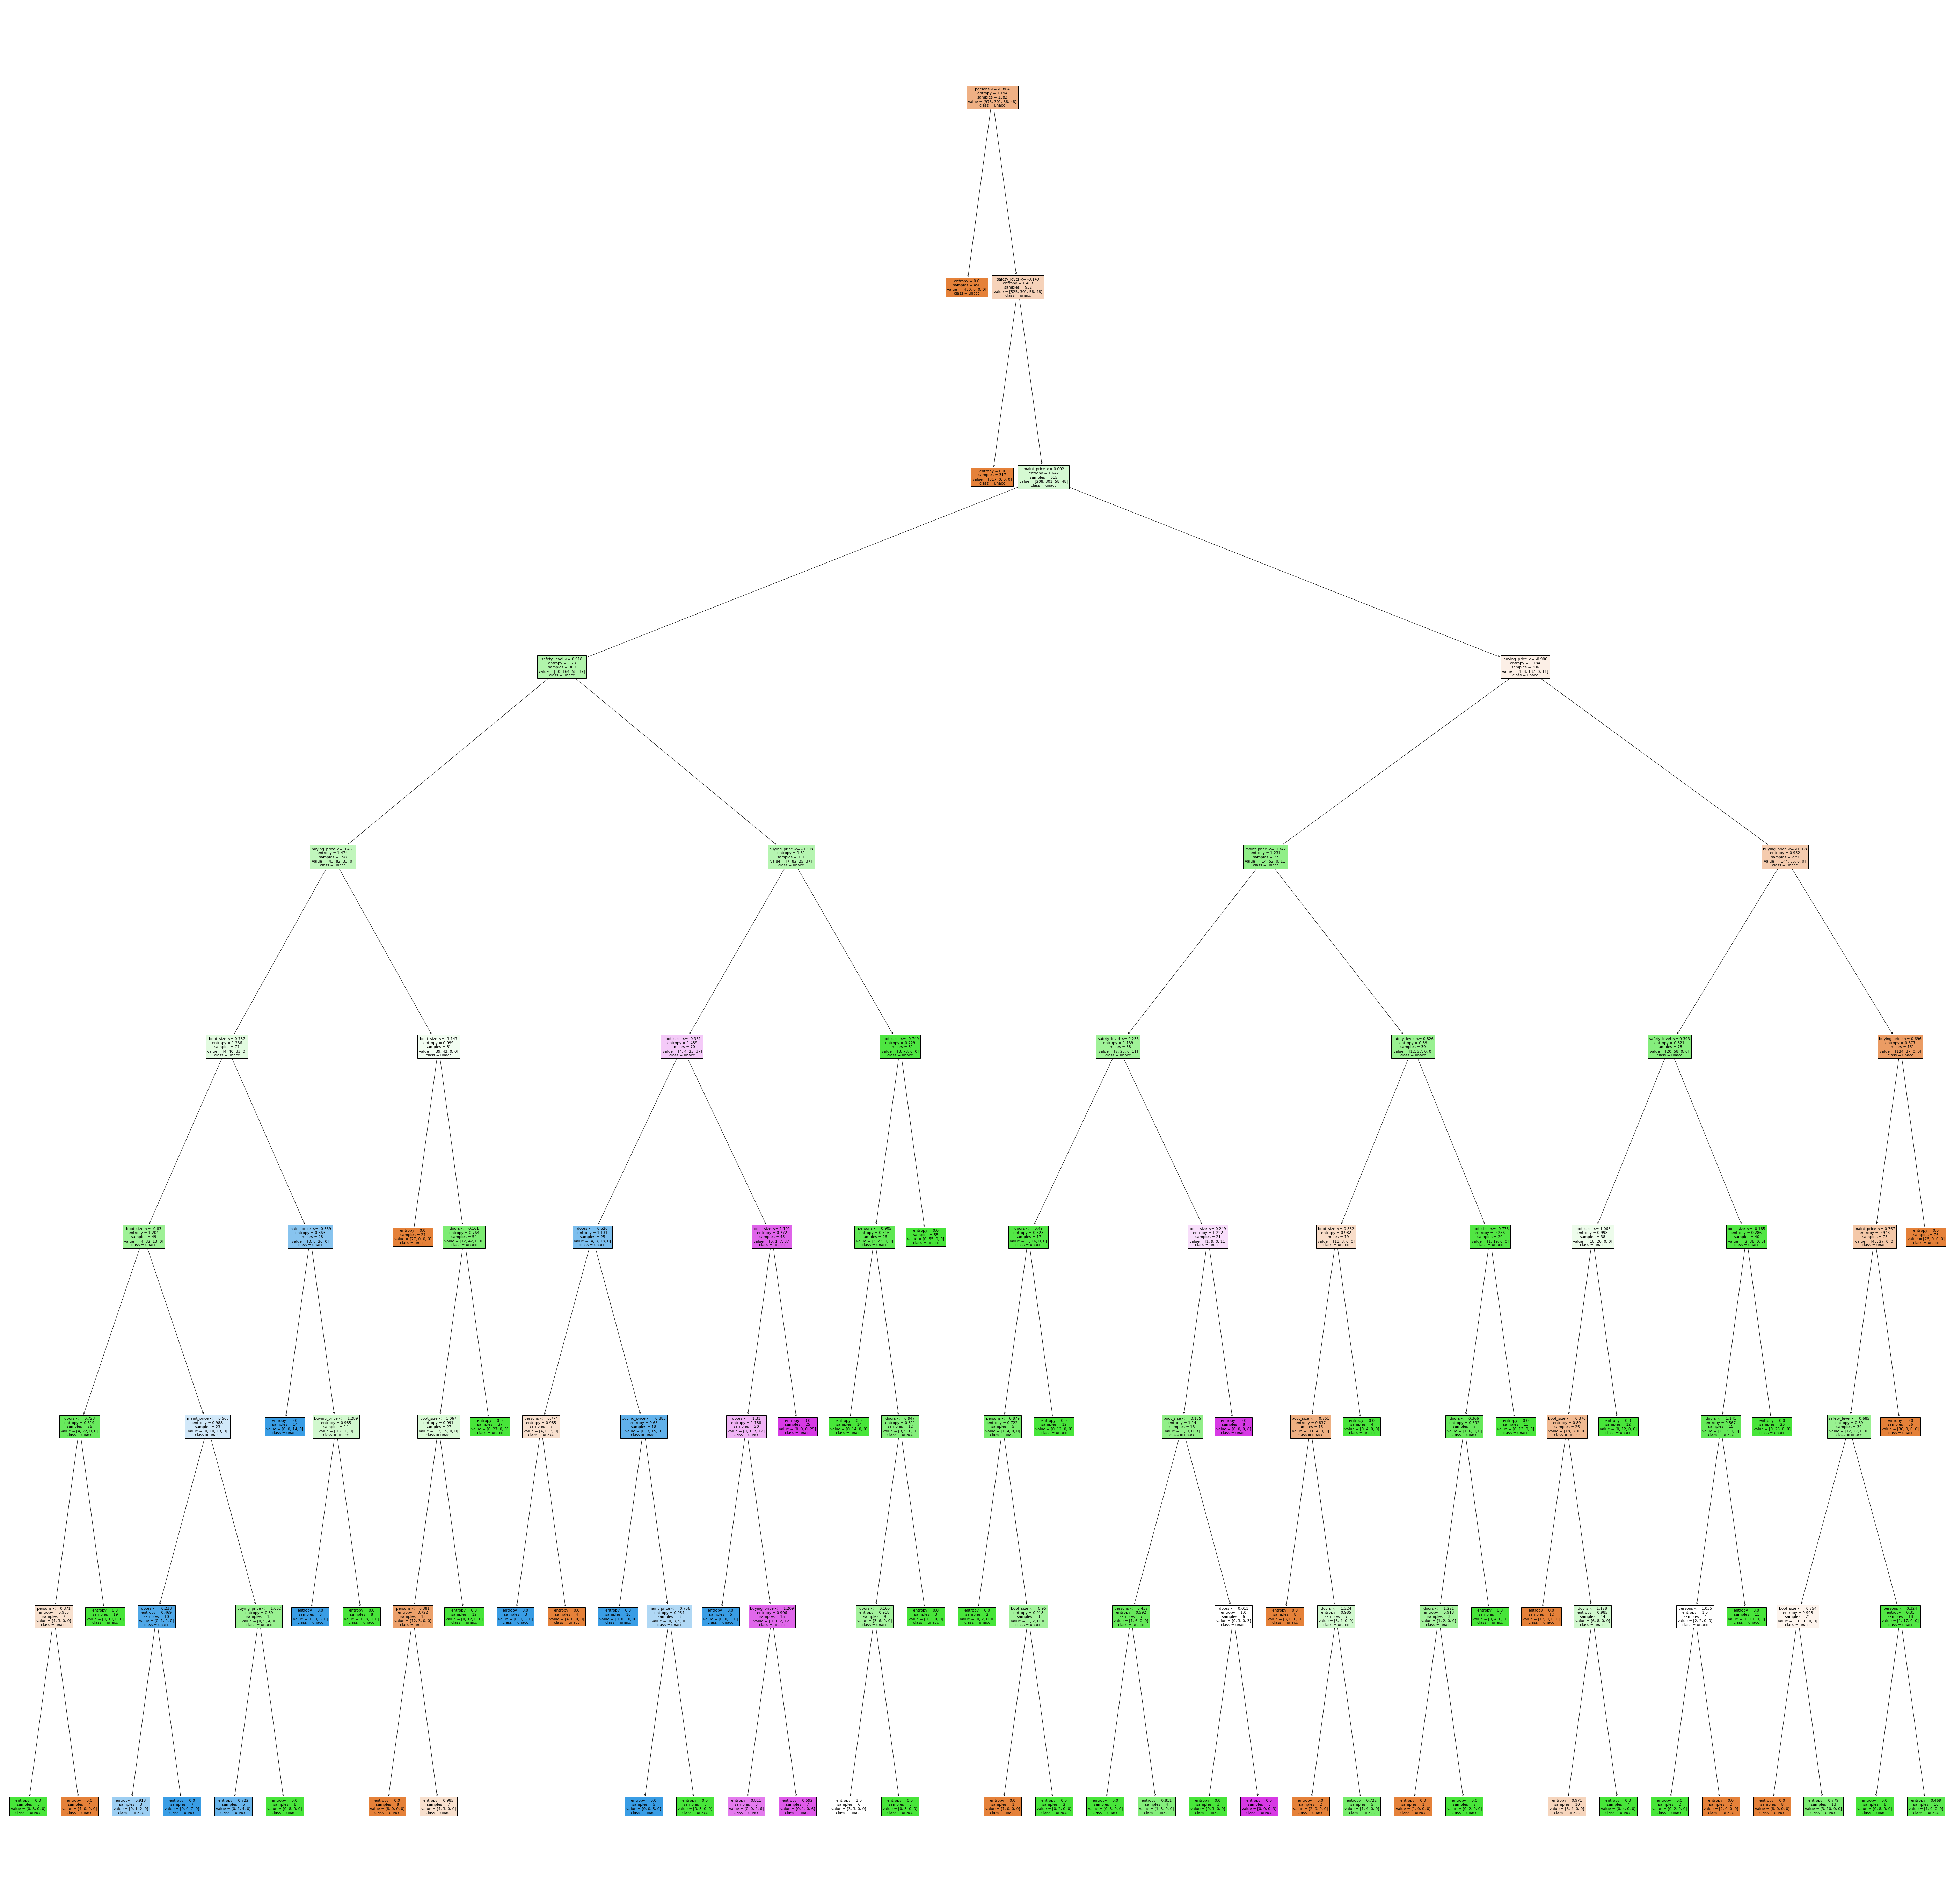

In [38]:
fig = plt.figure(figsize=(100,100))
c = tree.plot_tree(clf, feature_names=columns, class_names=df["car_acceptability"], filled=True)
plt.savefig('tree_cars.jpg',format='jpg',bbox_inches = "tight")